In [1]:
import numpy as np
import pandas as pd
import os
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import preprocessing

pd.set_option('display.max_columns', 500)
warnings.filterwarnings(action = 'ignore')

In [2]:
train_original = pd.read_csv('data/train.csv')
test_original = pd.read_csv('data/test.csv')

train = train_original.copy()
test = test_original.copy()

In [3]:
train = preprocessing.make_sum_column(train)
test = preprocessing.make_sum_column(test)

train = preprocessing.time_data(train)
test = preprocessing.time_data(test)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (25, 20))

sns.lineplot(x = 'Time', y = 'NX_total', ax = ax, data = test)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (25, 15))

sns.boxplot(x = 'month', y = 'NX_total', ax = ax, data = test)
plt.ylim((0, 300))
plt.show()

In [4]:
null_count = [0] * (train_original.shape[1] -1)
for length in range(train_original.shape[1] - 1) :
    null_count[length] = sum(train_original.iloc[ : , length + 1].isnull())

In [5]:
column = train_original.columns[1 : ]
null_counts = pd.DataFrame({'columns' :column, 
                           'null_count' : null_count})
null_counts.describe()

,null_count
count,1300.000000
mean,13054.977692
std,2421.513256
min,0.000000
25%,13842.000000
50%,13846.500000
75%,13873.250000
max,16909.000000


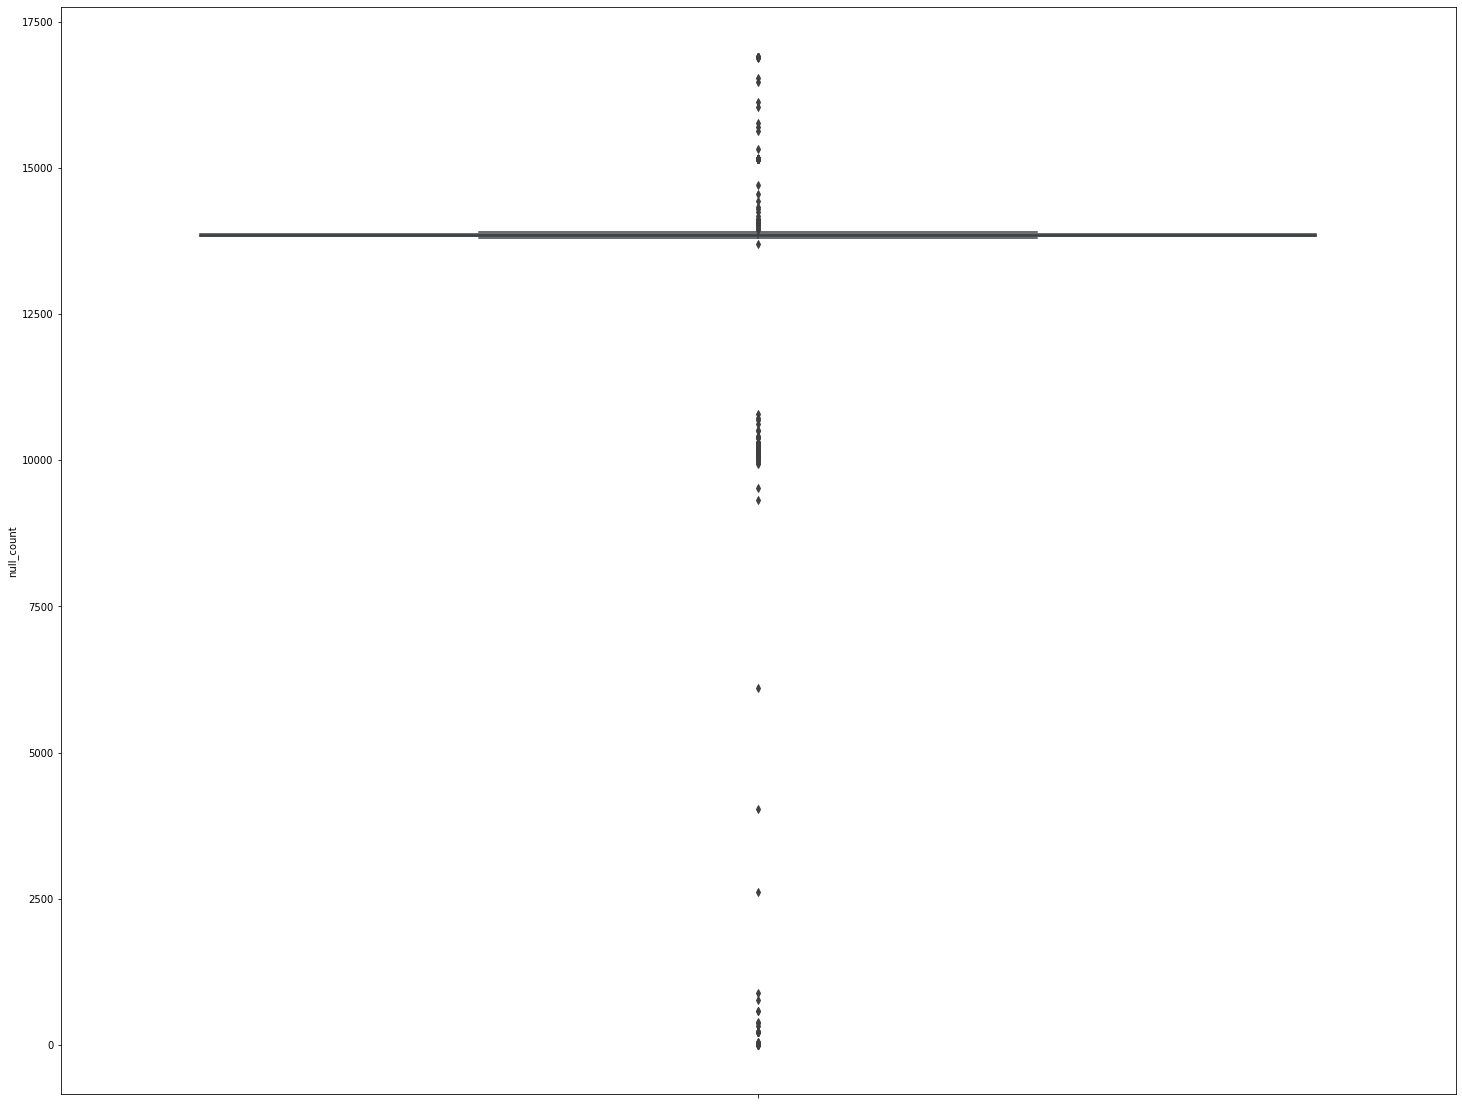

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (25, 20))

sns.boxplot(y = 'null_count', ax = ax, data = null_counts)
plt.show()